In [1]:
import os

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors


import pgd_attack
import run_attack

%matplotlib inline

In [2]:
NAT_MODEL_PATH = 'models/natural'
ADV_MODEL_PATH = 'models/adv_trained'

In [23]:
def heat_max(mat):
    """Approximately find the largest value that is not 1."""
    small = mat < 0.9
    heat_max = (10. / 9) * mat[small].max() if small.sum() else 1
    return heat_max

def visualize_output(out, title):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(22,9))
    ax0 = sns.heatmap(out[0], ax=ax0, vmax=heat_max(out[0]), annot=True, linewidths=1,
                      cmap=sns.light_palette('blue', as_cmap=True),
                      xticklabels=range(10), yticklabels=range(10), annot_kws={"size": 12})
    ax0.set_xlabel('Target Class', size=14)
    ax0.set_ylabel('Original Class', size=14)
    ax0.set_title(title, size=16)
    
    reachable = out[2][:, 1:]
    reachable_cumsum = reachable[:, ::-1].cumsum(axis=1)[:, ::-1]
    ax1 = sns.heatmap(reachable_cumsum, ax=ax1, vmax=heat_max(reachable_cumsum), annot=True, linewidths=1,
                      cmap=sns.light_palette('blue', as_cmap=True),
                      xticklabels=range(1, 11), yticklabels=range(10), annot_kws={"size": 12})
    ax1.set_xlabel('k', size=14)
    ax1.set_ylabel('Original Class', size=14)
    ax1.set_title('Proportion of Examples Classifiable as at Least k classes', size=16)    
    """
    ax1 = pd.Series(np.bincount(out[1], minlength=11)[1:], index=range(1,11)).plot.barh(ax=ax1)
    ax1.set_title('Reachable Classes by Example', size=16)
    ax1.set_xlabel('Count', size=14)
    ax1.set_ylabel('Number Reachable Classes', size=14)
    """
    plt.subplots_adjust(wspace=0.05) 
    plt.show()

In [4]:
%%capture
tf.reset_default_graph()
nat_01 = run_attack.run_class_attack_ext(NAT_MODEL_PATH, 'attacks/attack_nat_01.npy', 0.01)
tf.reset_default_graph()
nat_03 = run_attack.run_class_attack_ext(NAT_MODEL_PATH, 'attacks/attack_nat_03.npy', 0.03)
tf.reset_default_graph()
nat_1 = run_attack.run_class_attack_ext(NAT_MODEL_PATH, 'attacks/attack_nat_1.npy', 0.1)
tf.reset_default_graph()
nat_3 = run_attack.run_class_attack_ext(NAT_MODEL_PATH, 'attacks/attack_nat_3.npy', 0.3)

INFO:tensorflow:Restoring parameters from models/natural/checkpoint-24900
INFO:tensorflow:Restoring parameters from models/natural/checkpoint-24900
INFO:tensorflow:Restoring parameters from models/natural/checkpoint-24900
INFO:tensorflow:Restoring parameters from models/natural/checkpoint-24900


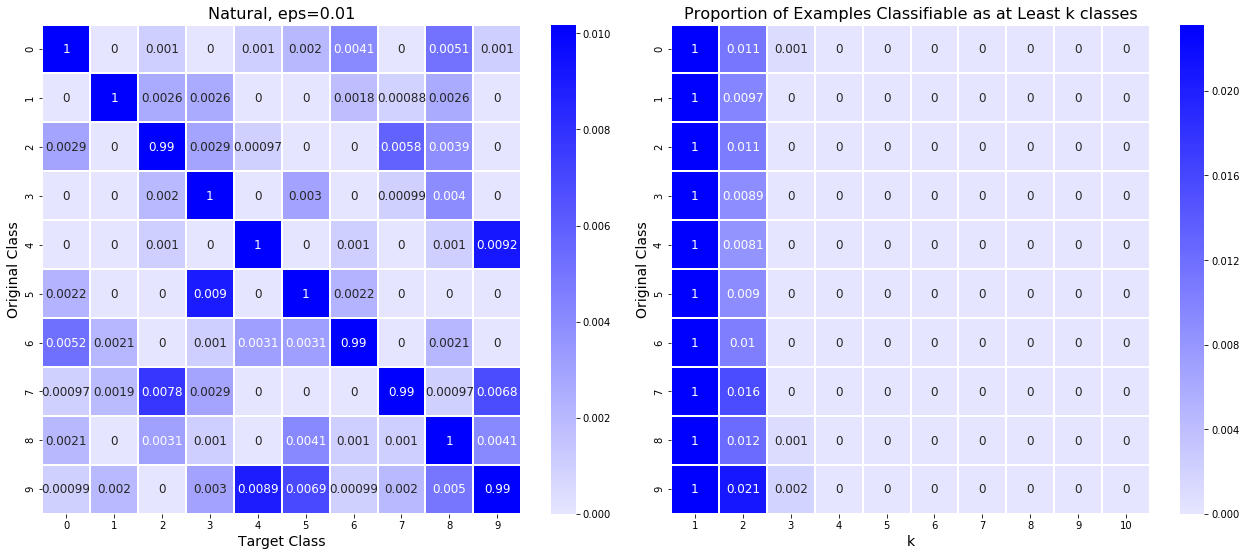

In [24]:
visualize_output(nat_01, 'Natural, eps=0.01')

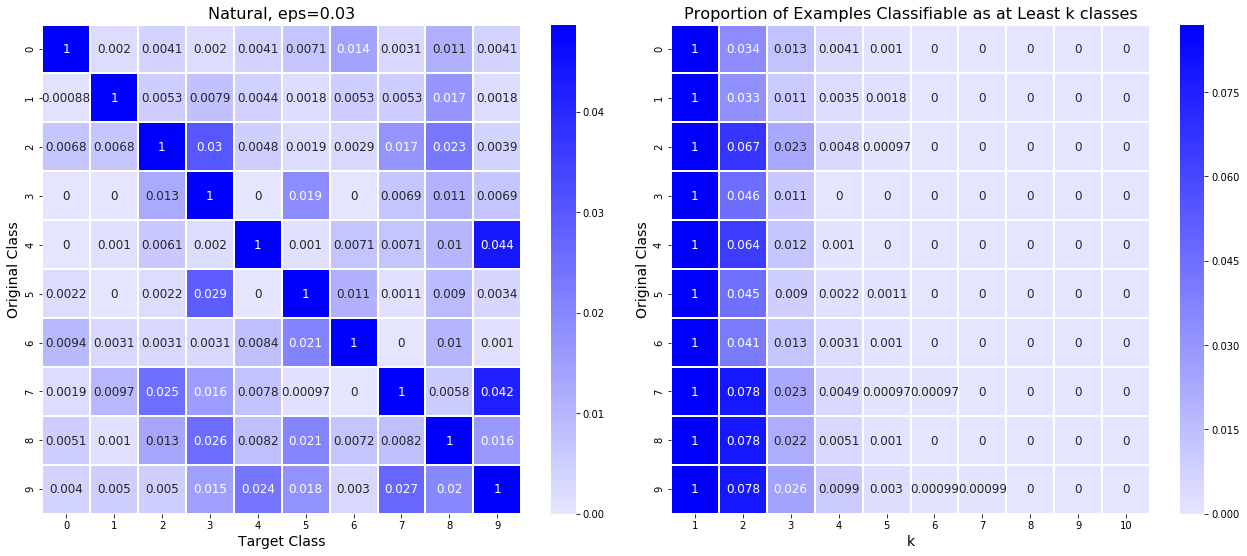

In [25]:
visualize_output(nat_03, 'Natural, eps=0.03')

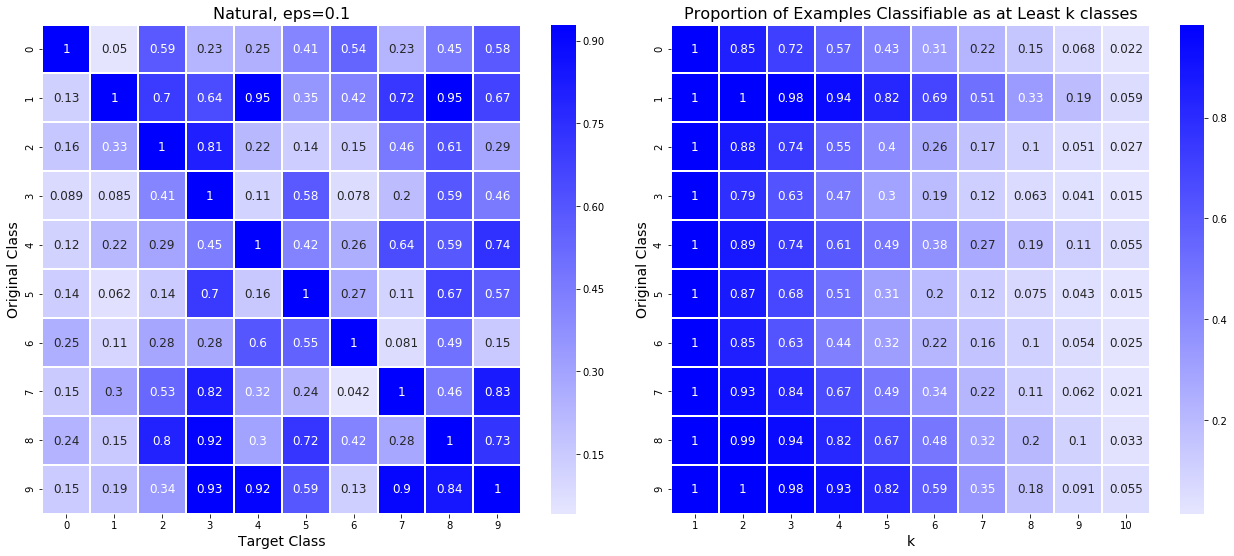

In [26]:
visualize_output(nat_1, 'Natural, eps=0.1')

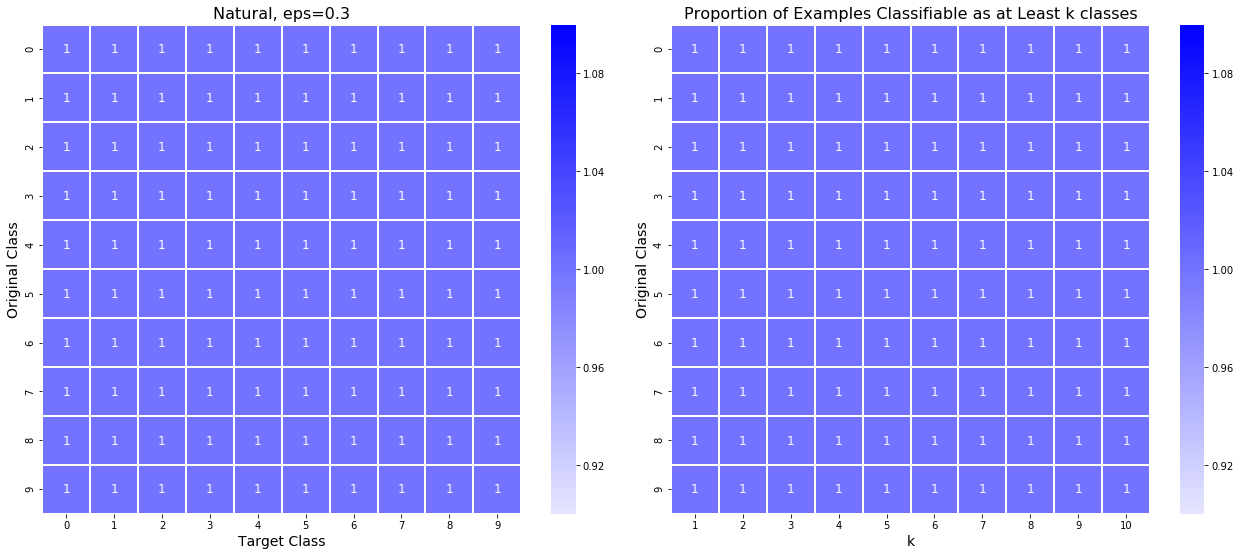

In [27]:
visualize_output(nat_3, 'Natural, eps=0.3')

In [9]:
%%capture
tf.reset_default_graph()
adv_3 = run_attack.run_class_attack_ext(ADV_MODEL_PATH, 'attacks/attack_adv_3.npy', 0.3)

INFO:tensorflow:Restoring parameters from models/adv_trained/checkpoint-99900


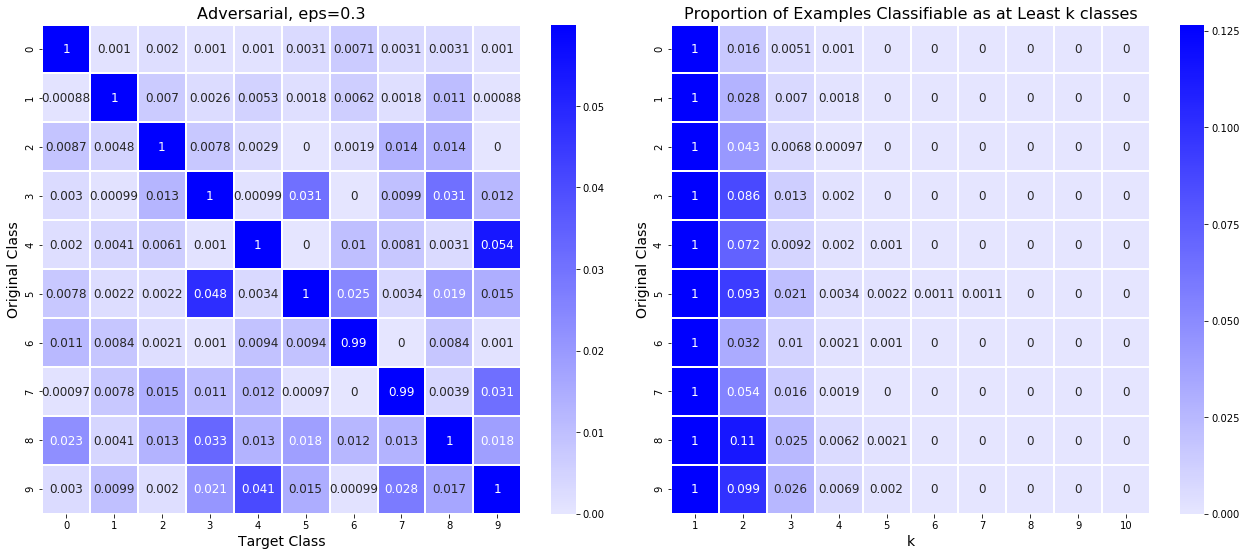

In [28]:
visualize_output(adv_3, 'Adversarial, eps=0.3')